# Airline Passenger Satisfaction dataset description
# phase 3

## Introduction
 Data mining techniques, such as classification and clustering, offer valuable tools for analyzing and extracting insights from datasets. Classification is a supervised learning technique that categorizes data into predefined classes or labels based on input features. The algorithm learns from labeled training data to predict the class labels of unseen instances. Clustering is an unsupervised learning technique that groups similar data points based on their characteristics or features.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [28]:
# Load your dataset
data = pd.read_csv('../Dataset/Processed_dataset.csv')

# Apply one-hot encoding to the 'Age' column(categorical)
df = pd.DataFrame(data)
df_encoded = pd.get_dummies(df['Age'], prefix='Age')
df_final = pd.concat([df, df_encoded], axis=1)
df_final = df_final.drop(columns=['Age', 'id'])

# Assuming 'X' contains features (Feature Matrix) and 'y' contains labels (Target Vector)
X = df_final.drop(columns=['satisfaction', 'satisfaction_decoded'])
y = df_final['satisfaction']
print('Preview of the processed data:')
display (df_final)

Preview of the processed data:


,Gender,Customer Type,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Departure Delay in Minutes,satisfaction,satisfaction_decoded,Class_decoded,Age_20-30,Age_30-40,Age_40-50,Age_50-60,Age_<20,Age_>=60
0,0,0,0,1,0.017511,4,3,4,3,4,...,0.205761,1,1,1,0,0,0,1,0,0
1,0,0,0,0,0.587764,1,3,1,5,4,...,0.000000,1,1,0,0,1,0,0,0,0
2,1,1,0,1,0.024262,0,2,4,2,2,...,0.000000,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0.696203,0,0,2,3,4,...,0.000000,1,1,0,0,0,1,0,0,0
4,0,0,0,1,0.233122,3,4,3,4,1,...,0.000000,1,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,1,0,0,0.069831,0,5,2,3,5,...,0.000000,1,1,0,0,0,0,0,1,0
496,0,0,0,0,0.228903,4,4,4,4,1,...,0.000000,1,1,0,0,0,1,0,0,0
497,0,0,0,0,0.034177,1,1,1,5,5,...,0.000000,1,1,0,0,1,0,0,0,0
498,0,0,0,0,0.198945,4,4,4,3,4,...,0.020576,1,1,0,0,0,0,1,0,0


## Classification
We will conduct comprehensive testing of the data mining technique, Decision tree classification, using three partitions. This thorough approach ensures the robustness, reliability, and generalization ability of the classification model, providing reassurance about its reliability for informed decision-making in model selection. In each partition, it will be tested by two attribute selection measures (IG (entropy) Gini index).

#### Three partition sizes:

70% training, 30% testing

80% training, 20% testing

90% training, 10% testing

### Gini index
The Gini index ranges from 0 to 1, where 0 indicates perfect purity (all data points belong to the same class), and 1 means maximum impurity (equal distribution of class labels). Decision trees choose the attribute with the lowest Gini index after a split as the splitting criterion.

### NOTE:
  
The decision trees are too large and complex, so we will prune them by setting a maximum depth to simplify the decision boundaries and reduce overlapping for both gini index and information gain. Pruning removes unnecessary branches from the tree to improve its interpretability without significantly sacrificing predictive performance. We will use  **grid search** in Python to tune the max-depth hyperparameter for classification.

In [34]:

# Define parameter grid
param_grid = {'max_depth': [3, 5, 7, 9, 11]}  # Define the range of values for max_depth

# Initialize Decision Tree classifier
clf = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X, y)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Print the best score found
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': 5}
Best Accuracy: 0.8460000000000001


Decision Tree using Gini Index 70% training 30% test
|--- Class <= 0.50
|   |--- Online boarding <= 3.50
|   |   |--- Leg room service <= 3.50
|   |   |   |--- Leg room service <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Leg room service >  1.50
|   |   |   |   |--- Departure/Arrival time convenient <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Departure/Arrival time convenient >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- Leg room service >  3.50
|   |   |   |--- Flight Distance <= 0.21
|   |   |   |   |--- Ease of Online booking <= 1.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Ease of Online booking >  1.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- Flight Distance >  0.21
|   |   |   |   |--- class: 1
|   |--- Online boarding >  3.50
|   |   |--- Cleanliness <= 2.50
|   |   |   |--- Seat comfort <= 2.50
|   |   |   |   |--- Departure Delay in Minutes <= 0.23
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Departure De

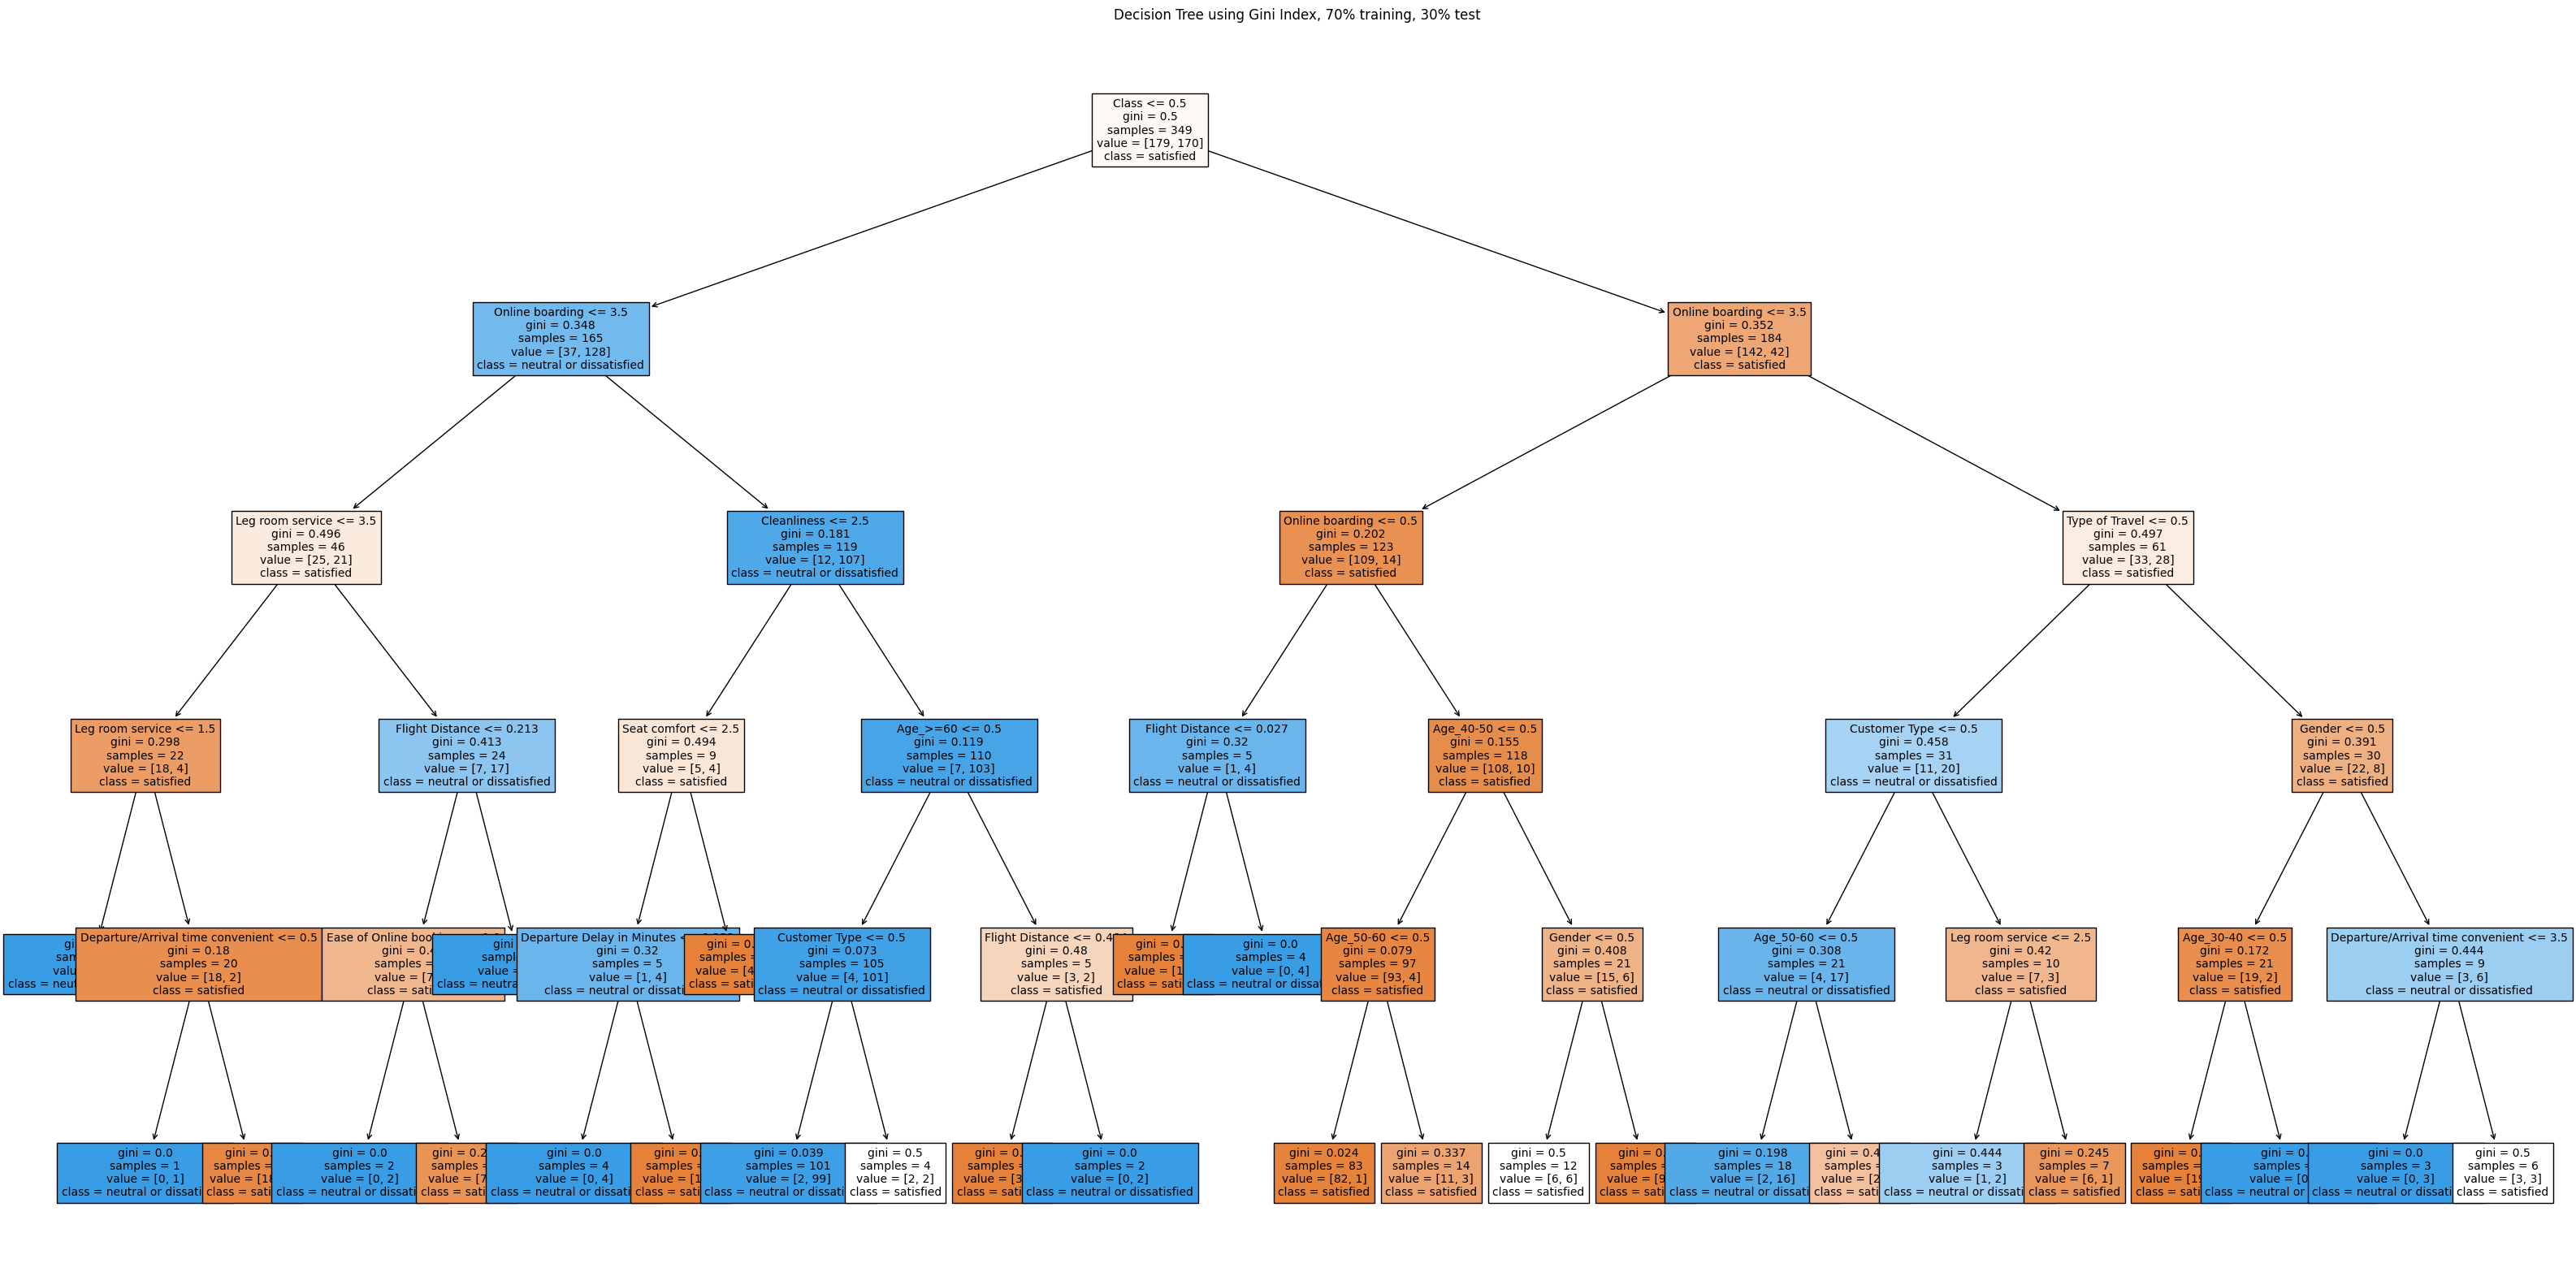

Decision Tree using Gini Index 80% training 19% test
|--- Online boarding <= 3.50
|   |--- Online boarding <= 0.50
|   |   |--- Checkin service <= 2.50
|   |   |   |--- class: 0
|   |   |--- Checkin service >  2.50
|   |   |   |--- class: 1
|   |--- Online boarding >  0.50
|   |   |--- Flight Distance <= 0.39
|   |   |   |--- Type of Travel <= 0.50
|   |   |   |   |--- Customer Type <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Customer Type >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Type of Travel >  0.50
|   |   |   |   |--- Ease of Online booking <= 3.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Ease of Online booking >  3.50
|   |   |   |   |   |--- class: 1
|   |   |--- Flight Distance >  0.39
|   |   |   |--- Leg room service <= 3.50
|   |   |   |   |--- Age_20-30 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age_20-30 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Leg room service >  3.50
|   |   |   |   

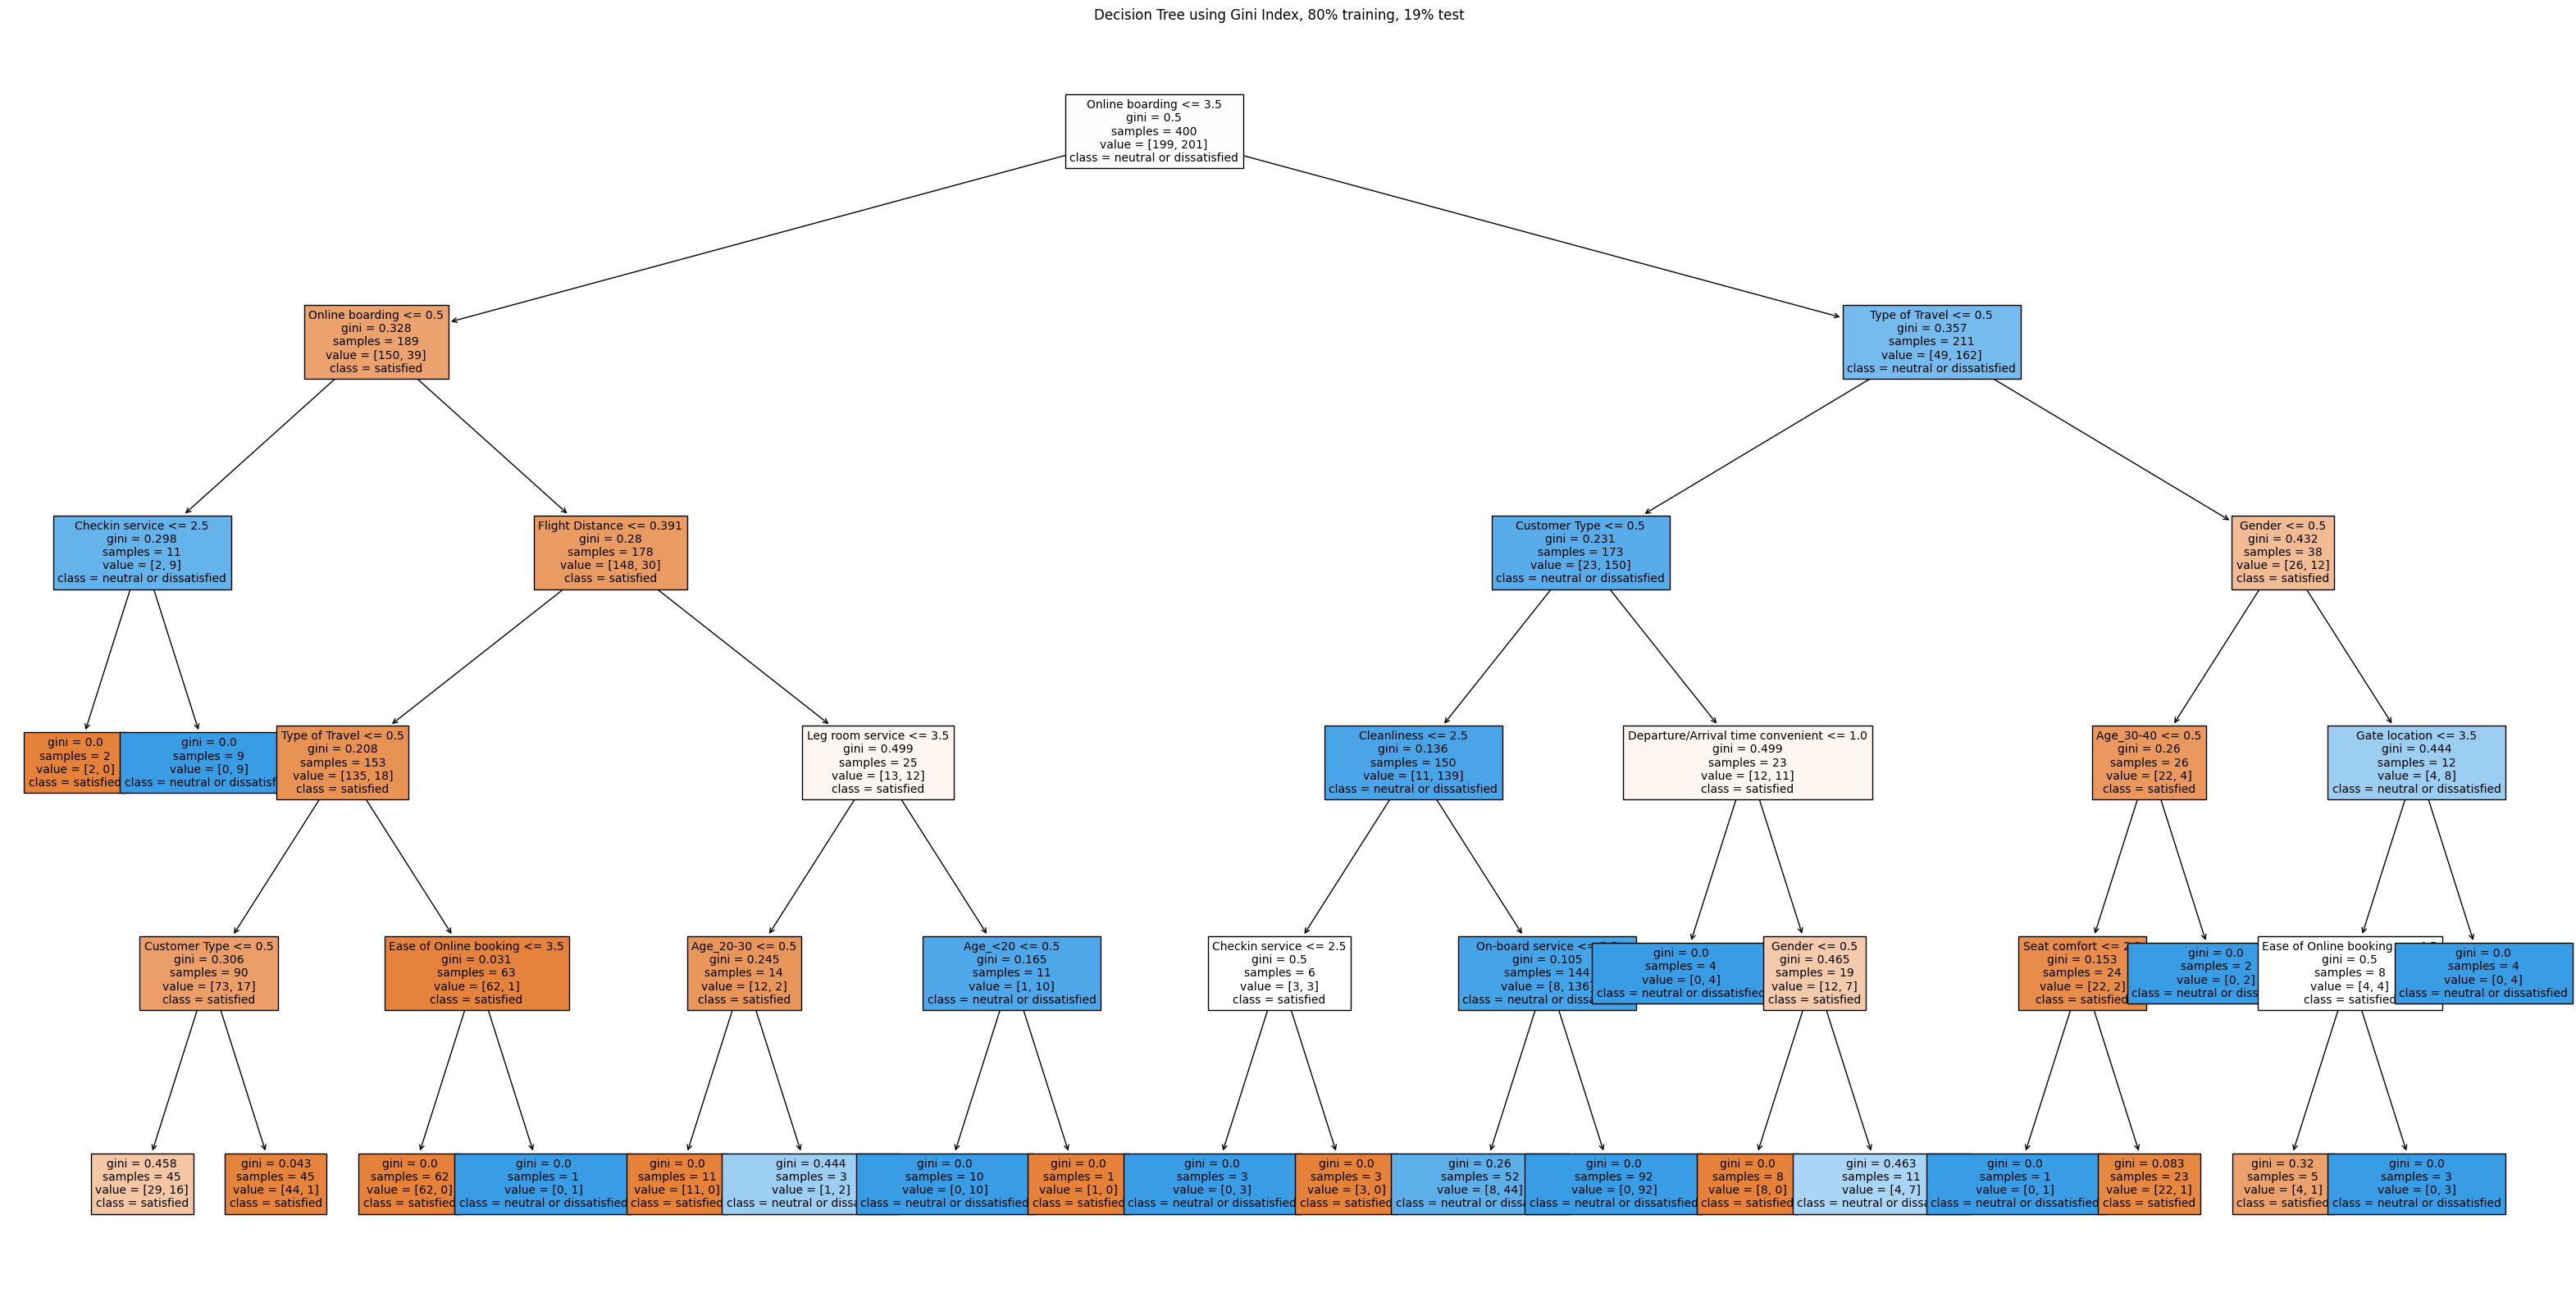

Decision Tree using Gini Index 90% training 9% test
|--- Online boarding <= 3.50
|   |--- Type of Travel <= 0.50
|   |   |--- Customer Type <= 0.50
|   |   |   |--- Leg room service <= 3.50
|   |   |   |   |--- Online boarding <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Online boarding >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Leg room service >  3.50
|   |   |   |   |--- Inflight entertainment <= 3.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Inflight entertainment >  3.50
|   |   |   |   |   |--- class: 1
|   |   |--- Customer Type >  0.50
|   |   |   |--- Online boarding <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Online boarding >  0.50
|   |   |   |   |--- Flight Distance <= 0.03
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Flight Distance >  0.03
|   |   |   |   |   |--- class: 0
|   |--- Type of Travel >  0.50
|   |   |--- Ease of Online booking <= 0.50
|   |   |   |--- Flight Distance <= 0.03
|   |   |   |   

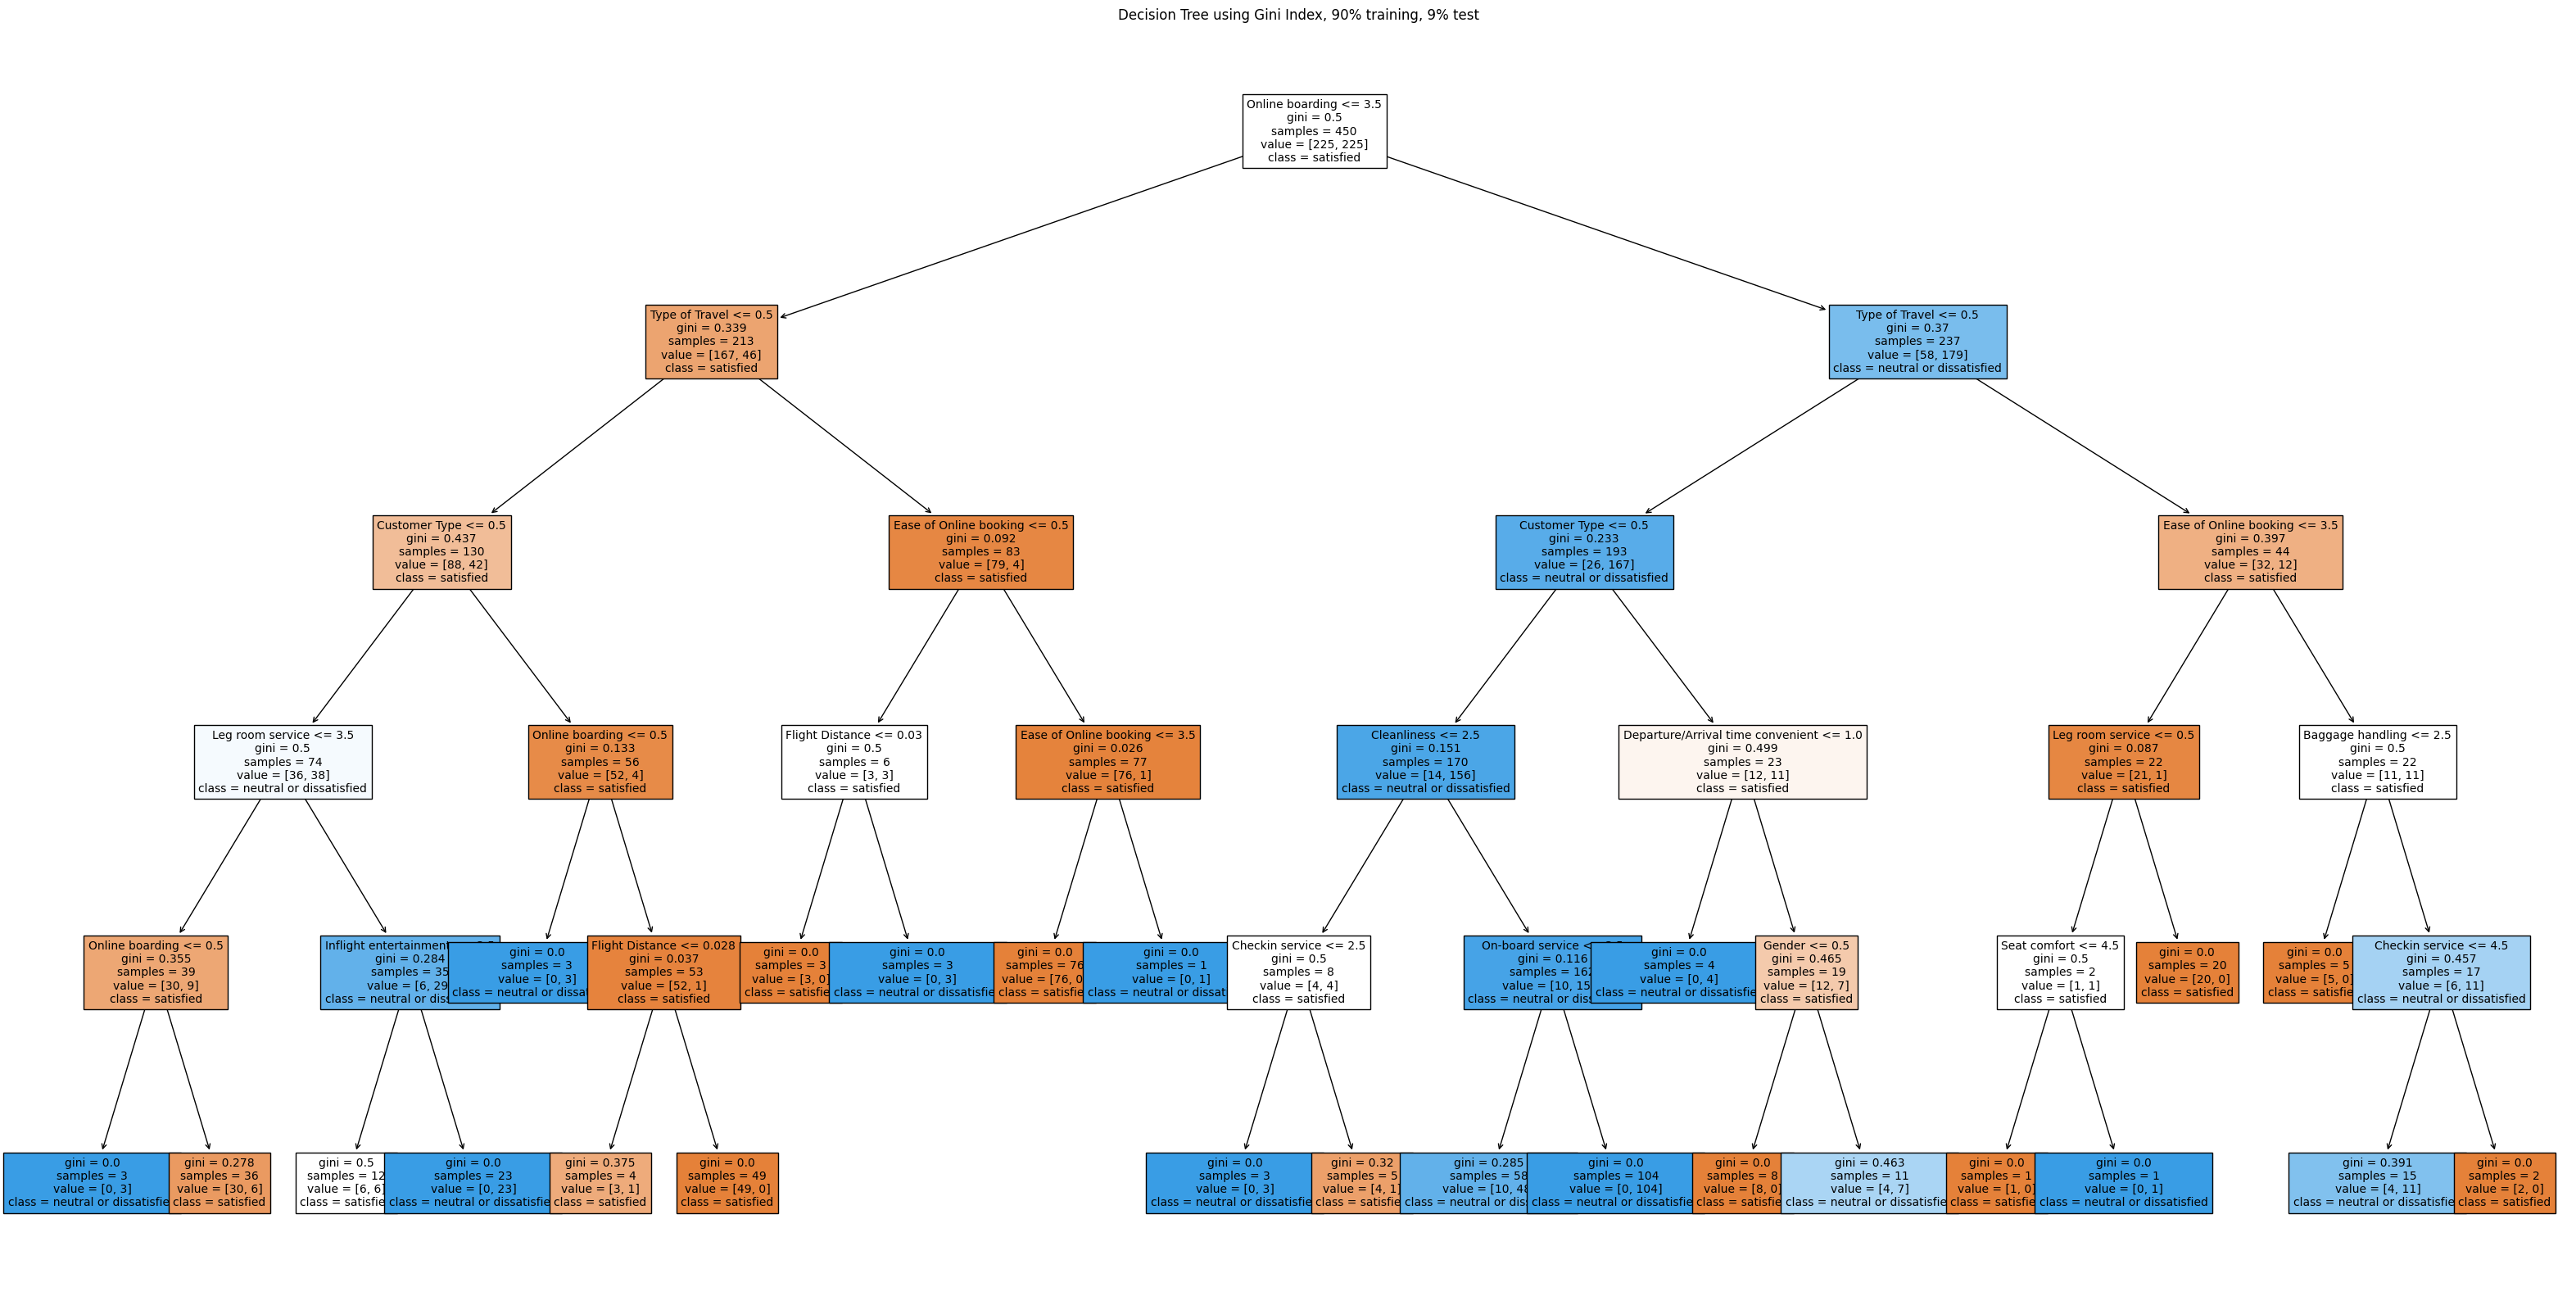

   Partition Size Attribute Selection Measure  Accuracy  Precision   Recall  \
0             0.7                        gini  0.788079   0.863636  0.71250   
1             0.8                        gini  0.840000   0.883721  0.77551   
2             0.9                        gini  0.880000   0.880000  0.88000   

   Specificity  
0     0.873239  
1     0.901961  
2     0.880000  


In [35]:
# Define partition sizes
partition_sizes = [0.7, 0.8, 0.9]

# Initialize an empty list to store results
results = []

# Loop over partition sizes
for size in partition_sizes:
    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-size, random_state=42)
    
    # Initialize Decision Tree classifier with specified criterion and maximum depth
    clf = DecisionTreeClassifier(criterion='gini', max_depth=5,random_state=42)  # Set max_depth as desired
    
    # Fit the classifier on the training data
    clf.fit(X_train, y_train)

    # Extract decision tree rules
    print('Decision Tree using Gini Index {}% training {}% test'.format(int(size*100), int((1-size)*100)))
    tree_rules = export_text(clf, feature_names=X.columns.tolist())
    print(tree_rules)
    
    # Plot the decision tree
    plt.figure(figsize=(40, 20))
    plot_tree(clf, filled=True, feature_names=X.columns, class_names=['satisfied', 'neutral or dissatisfied'],fontsize=10)
    plt.title('Decision Tree using Gini Index, {}% training, {}% test'.format(int(size*100), int((1-size)*100)))
    plt.show()

    # Predict labels for test set
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    
    # Append results to list
    results.append((size, 'gini', accuracy, precision, recall, specificity))

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results, columns=['Partition Size', 'Attribute Selection Measure', 'Accuracy', 'Precision', 'Recall', 'Specificity'])
print(results_df)

#### summary of the partition sizes based on Gini index
* The accuracy of the models generally improves as the partition size increases. The accuracy of the model ranges from approximately 78.8% to 88%, depending on the partition size. The highest accuracy is achieved at a partition size of 90%
* Precision, which measures the proportion of true positives among all positive predictions, ranges from around 86.3% to 88.3%. The highest precision is observed at a partition size of 90%.
* Recall represents the proportion of true positives that are correctly identified by the model. It ranges from approximately 72% to 88%, with the highest recall achieved at a partition size of 90%.
*  Specificity indicates the proportion of true negatives that are correctly identified by the model. It ranges from around 87.3% to 90.1%, with the highest specificity observed at a partition size of 90%.

### Information Gain
Information gain measures the reduction in entropy (uncertainty or disorder), which ranges from 0 to positive infinity. It is achieved by splitting data points on a particular attribute—the attribute with the highest information gain after a split is chosen as the splitting criterion.

Decision Tree using Information Gain(entropy) 70% training 30% test
|--- Class <= 0.50
|   |--- Online boarding <= 3.50
|   |   |--- Leg room service <= 3.50
|   |   |   |--- Age_20-30 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Age_20-30 >  0.50
|   |   |   |   |--- Leg room service <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Leg room service >  1.50
|   |   |   |   |   |--- class: 0
|   |   |--- Leg room service >  3.50
|   |   |   |--- Flight Distance <= 0.21
|   |   |   |   |--- Departure/Arrival time convenient <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Departure/Arrival time convenient >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Flight Distance >  0.21
|   |   |   |   |--- class: 1
|   |--- Online boarding >  3.50
|   |   |--- Flight Distance <= 0.46
|   |   |   |--- Leg room service <= 3.50
|   |   |   |   |--- Departure Delay in Minutes <= 0.01
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Departure Delay

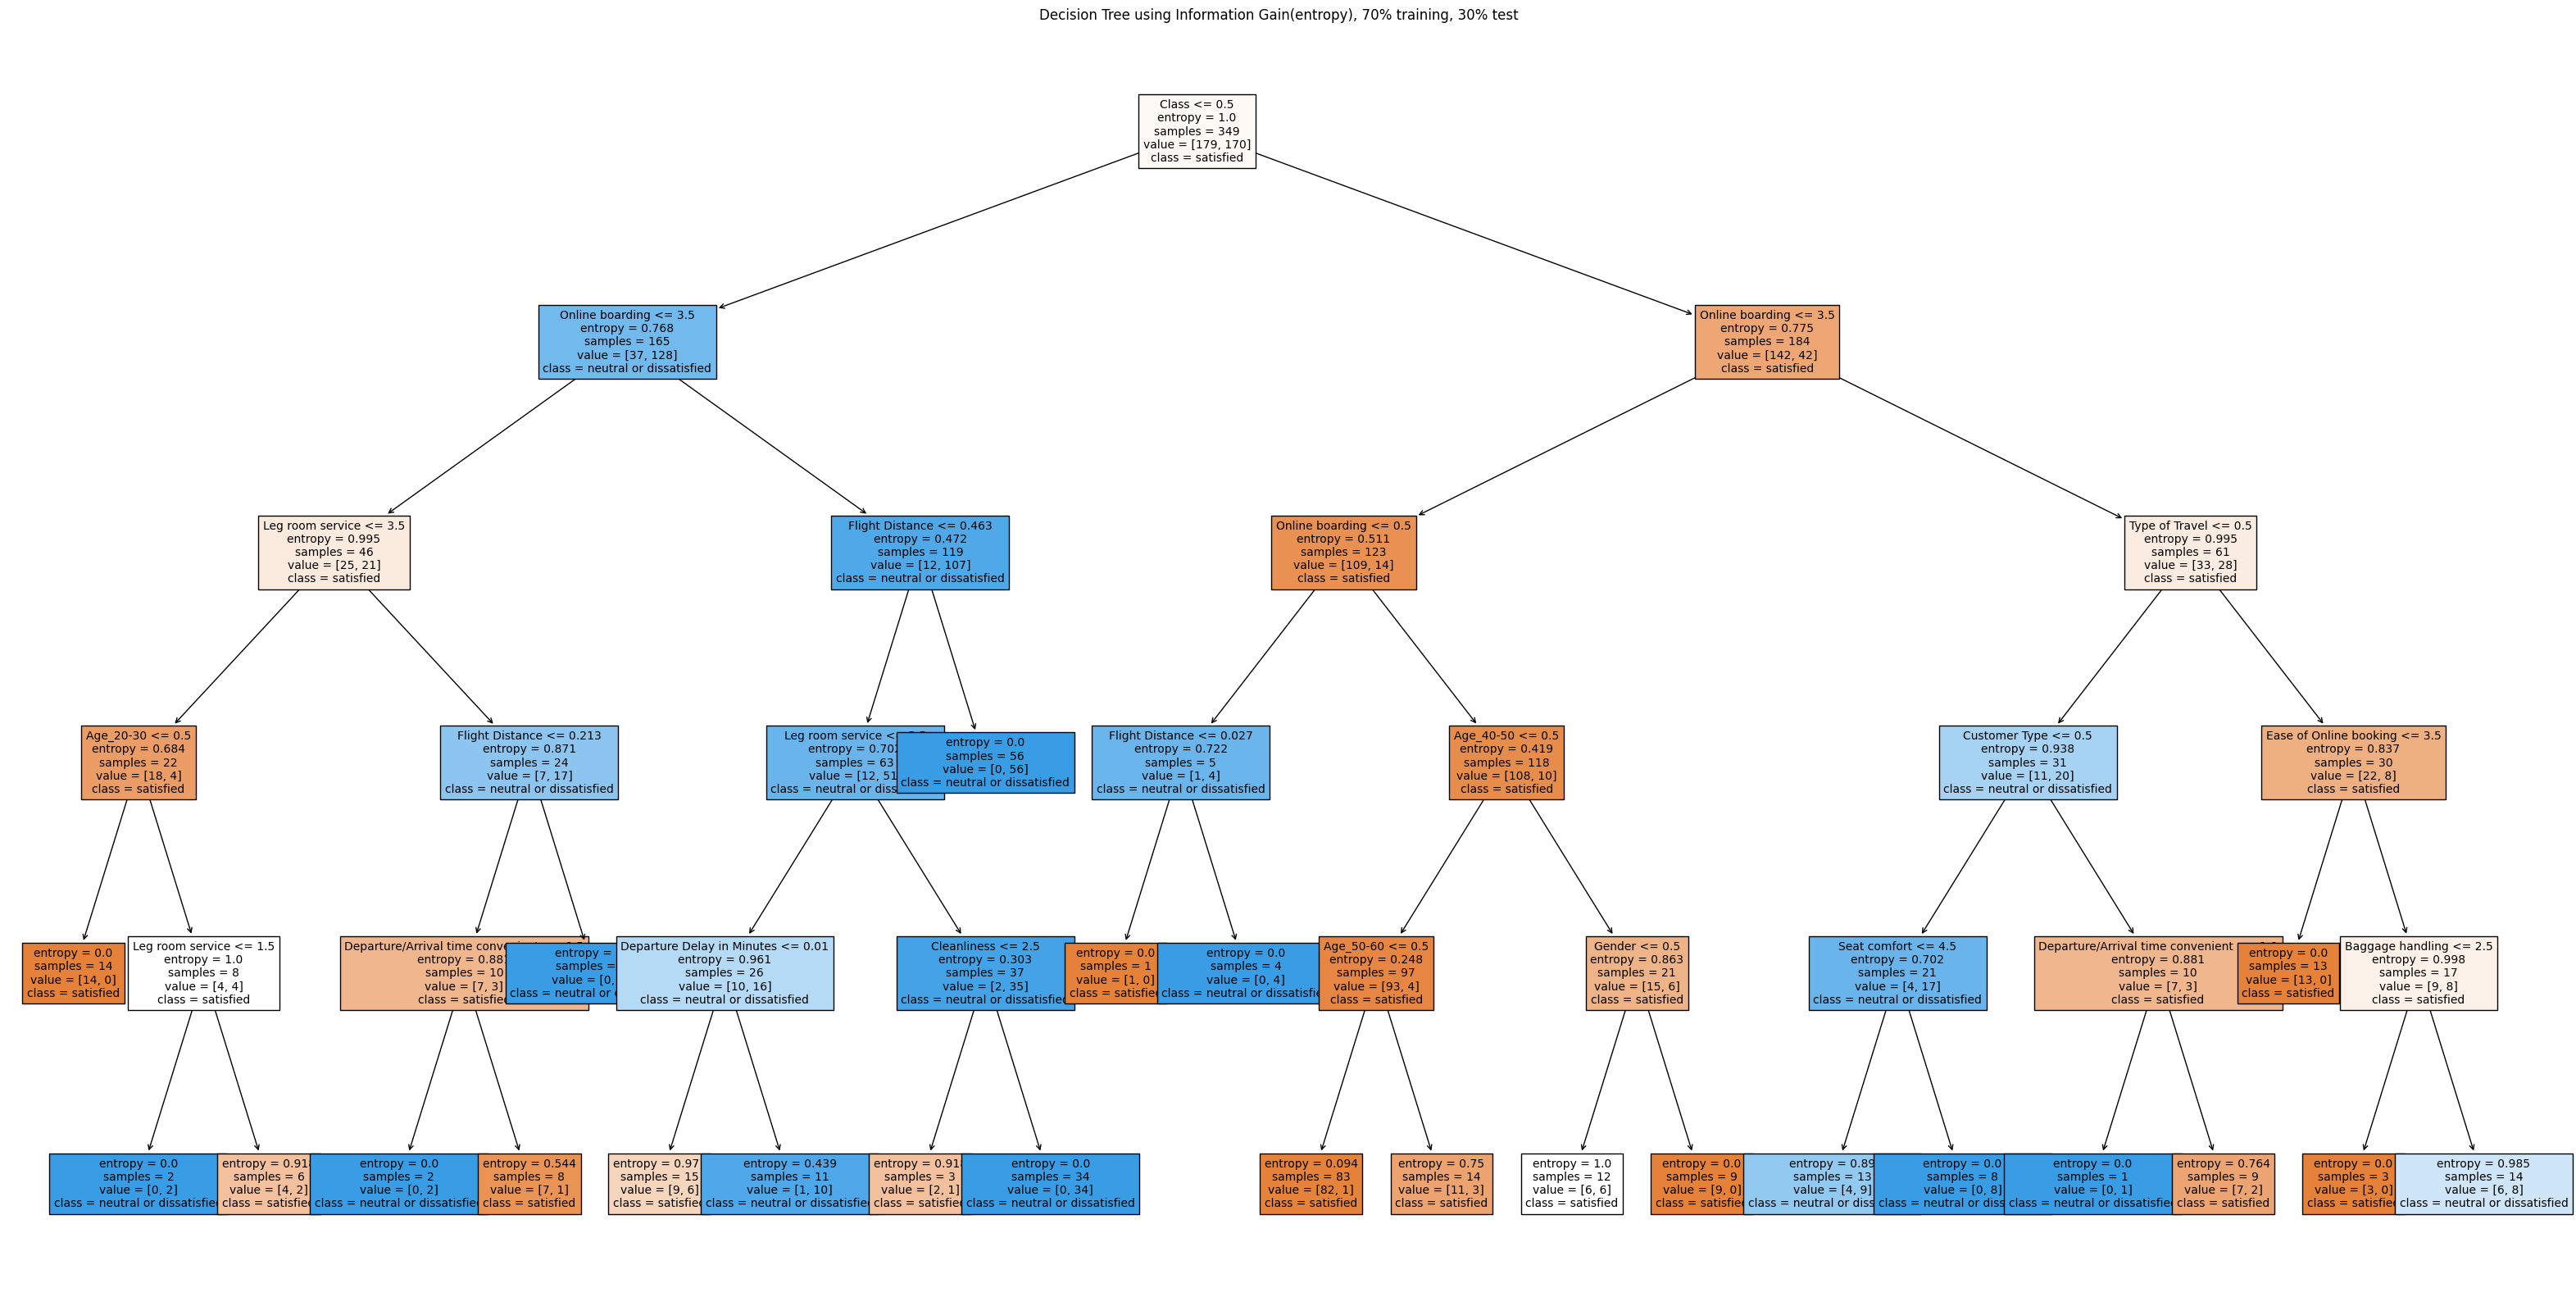

Decision Tree using Information Gain(entropy) 80% training 19% test
|--- Online boarding <= 3.50
|   |--- Online boarding <= 0.50
|   |   |--- Checkin service <= 2.50
|   |   |   |--- class: 0
|   |   |--- Checkin service >  2.50
|   |   |   |--- class: 1
|   |--- Online boarding >  0.50
|   |   |--- Type of Travel <= 0.50
|   |   |   |--- Customer Type <= 0.50
|   |   |   |   |--- Leg room service <= 3.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Leg room service >  3.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Customer Type >  0.50
|   |   |   |   |--- Flight Distance <= 0.03
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Flight Distance >  0.03
|   |   |   |   |   |--- class: 0
|   |   |--- Type of Travel >  0.50
|   |   |   |--- Ease of Online booking <= 3.50
|   |   |   |   |--- class: 0
|   |   |   |--- Ease of Online booking >  3.50
|   |   |   |   |--- class: 1
|--- Online boarding >  3.50
|   |--- Type of Travel <= 0.50
|   |   |--- Customer Type

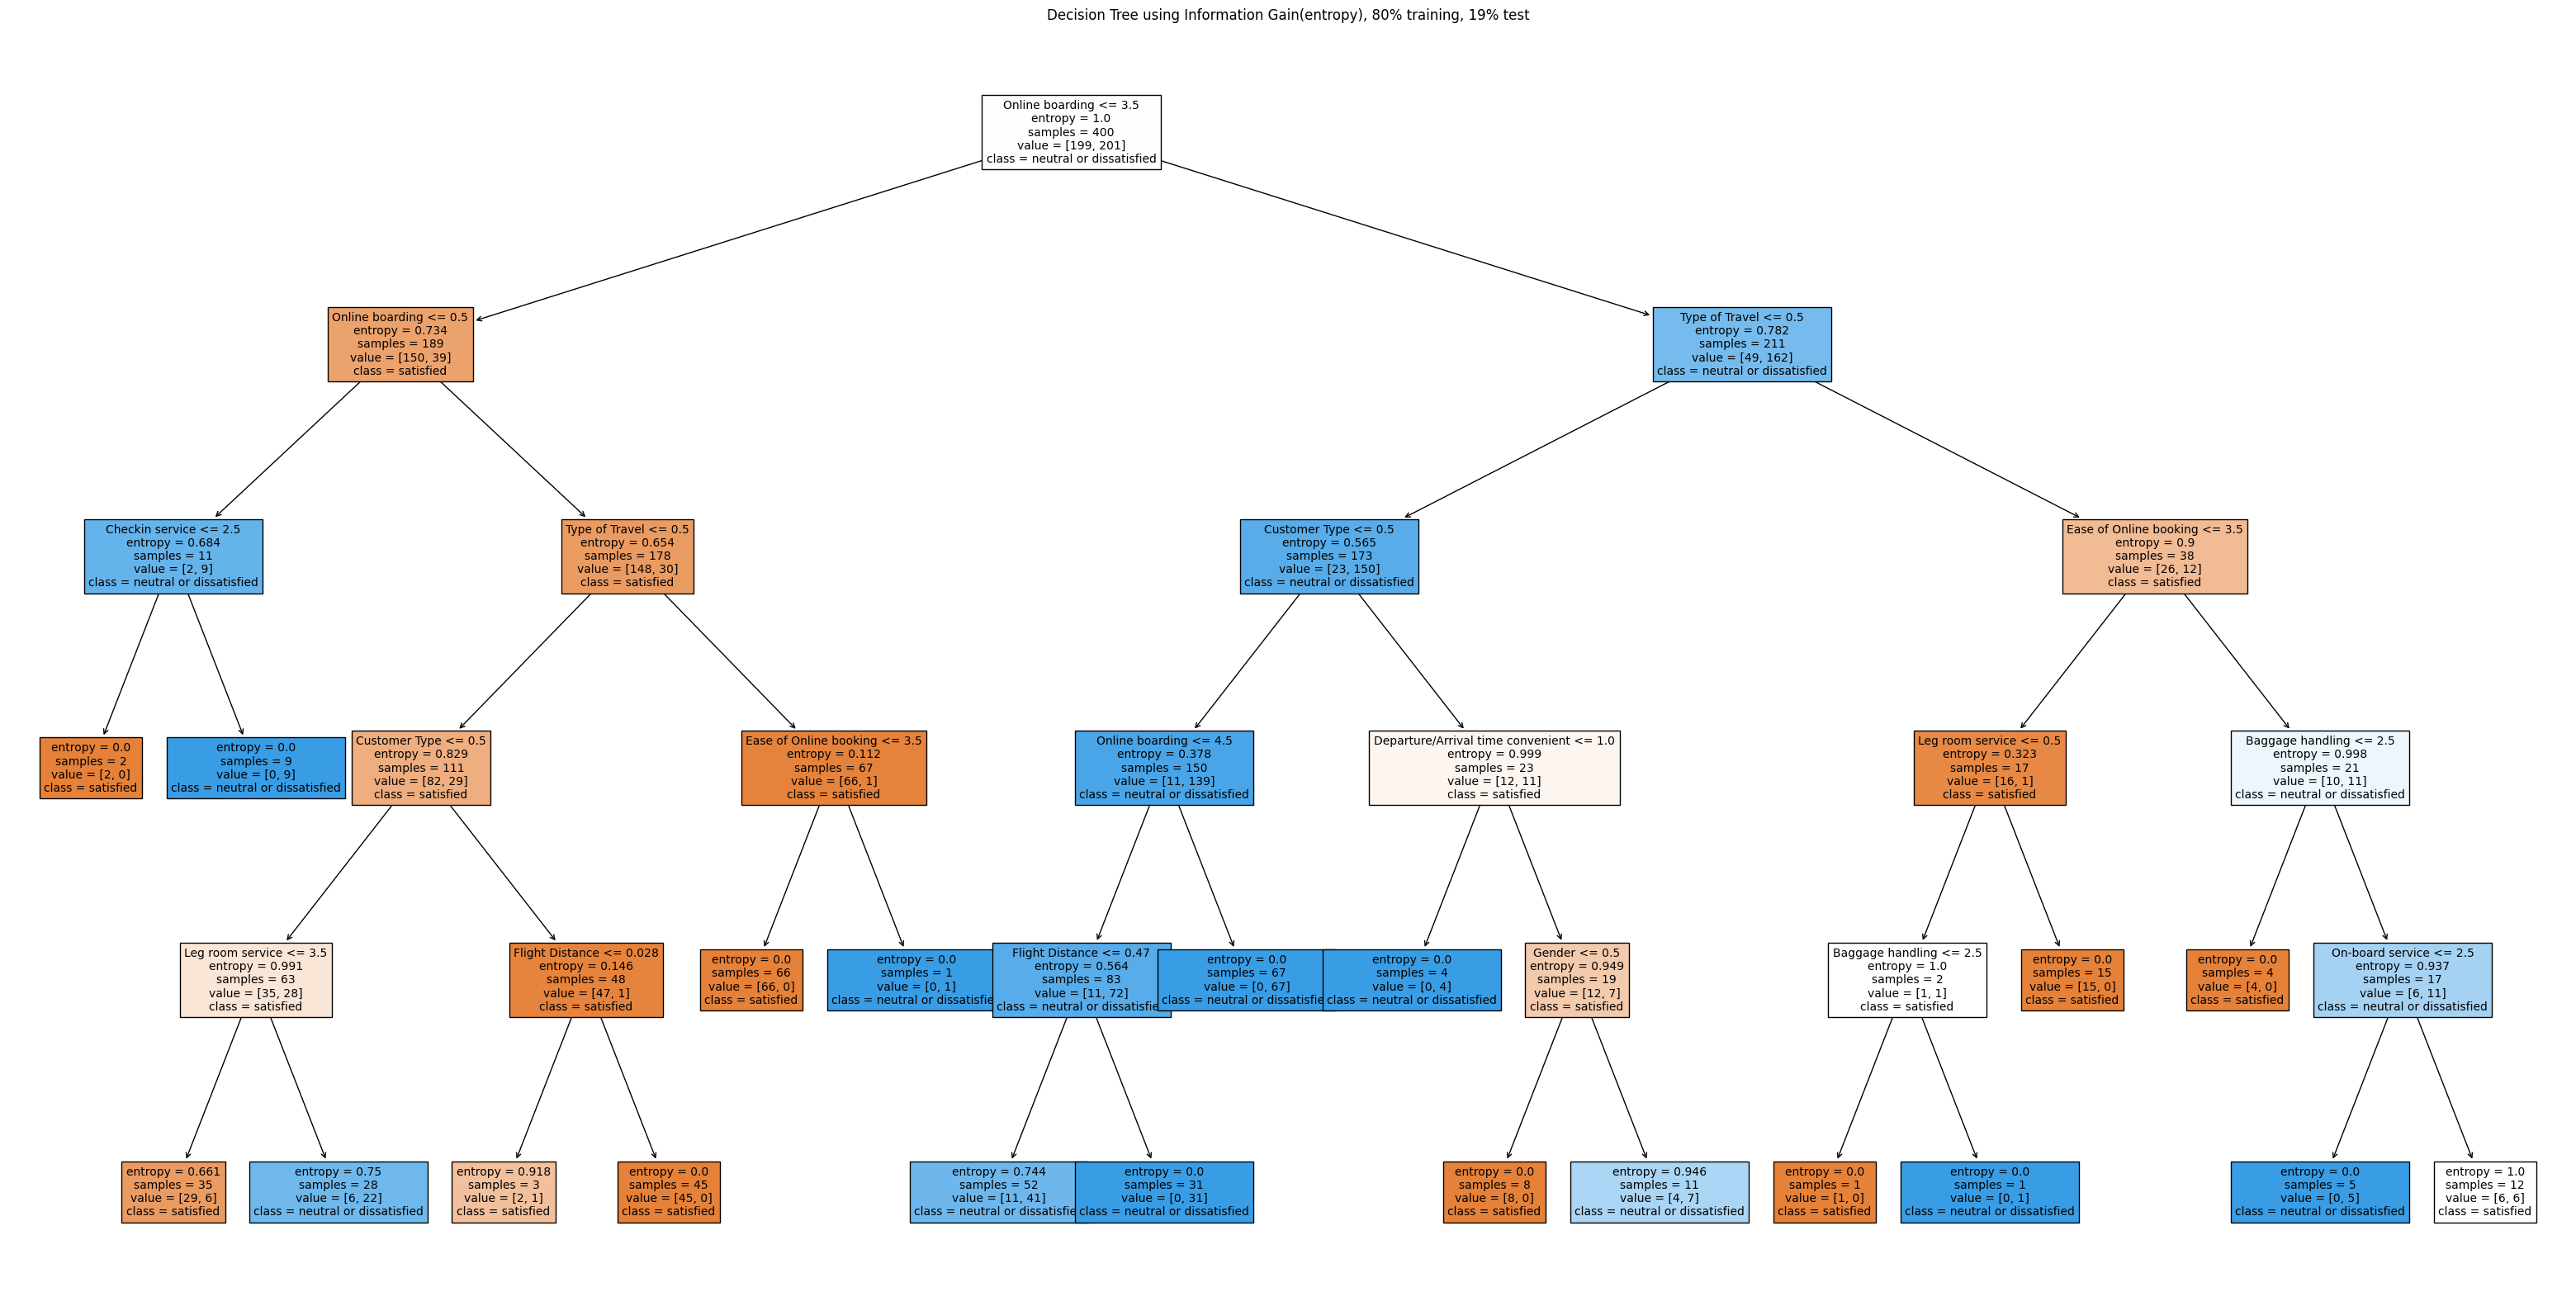

Decision Tree using Information Gain(entropy) 90% training 9% test
|--- Online boarding <= 3.50
|   |--- Type of Travel <= 0.50
|   |   |--- Customer Type <= 0.50
|   |   |   |--- Leg room service <= 3.50
|   |   |   |   |--- Departure Delay in Minutes <= 0.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Departure Delay in Minutes >  0.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- Leg room service >  3.50
|   |   |   |   |--- Inflight entertainment <= 3.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Inflight entertainment >  3.50
|   |   |   |   |   |--- class: 1
|   |   |--- Customer Type >  0.50
|   |   |   |--- Online boarding <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Online boarding >  0.50
|   |   |   |   |--- Flight Distance <= 0.03
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Flight Distance >  0.03
|   |   |   |   |   |--- class: 0
|   |--- Type of Travel >  0.50
|   |   |--- Ease of Online booking <= 0.50
|   |   |   |--- Fli

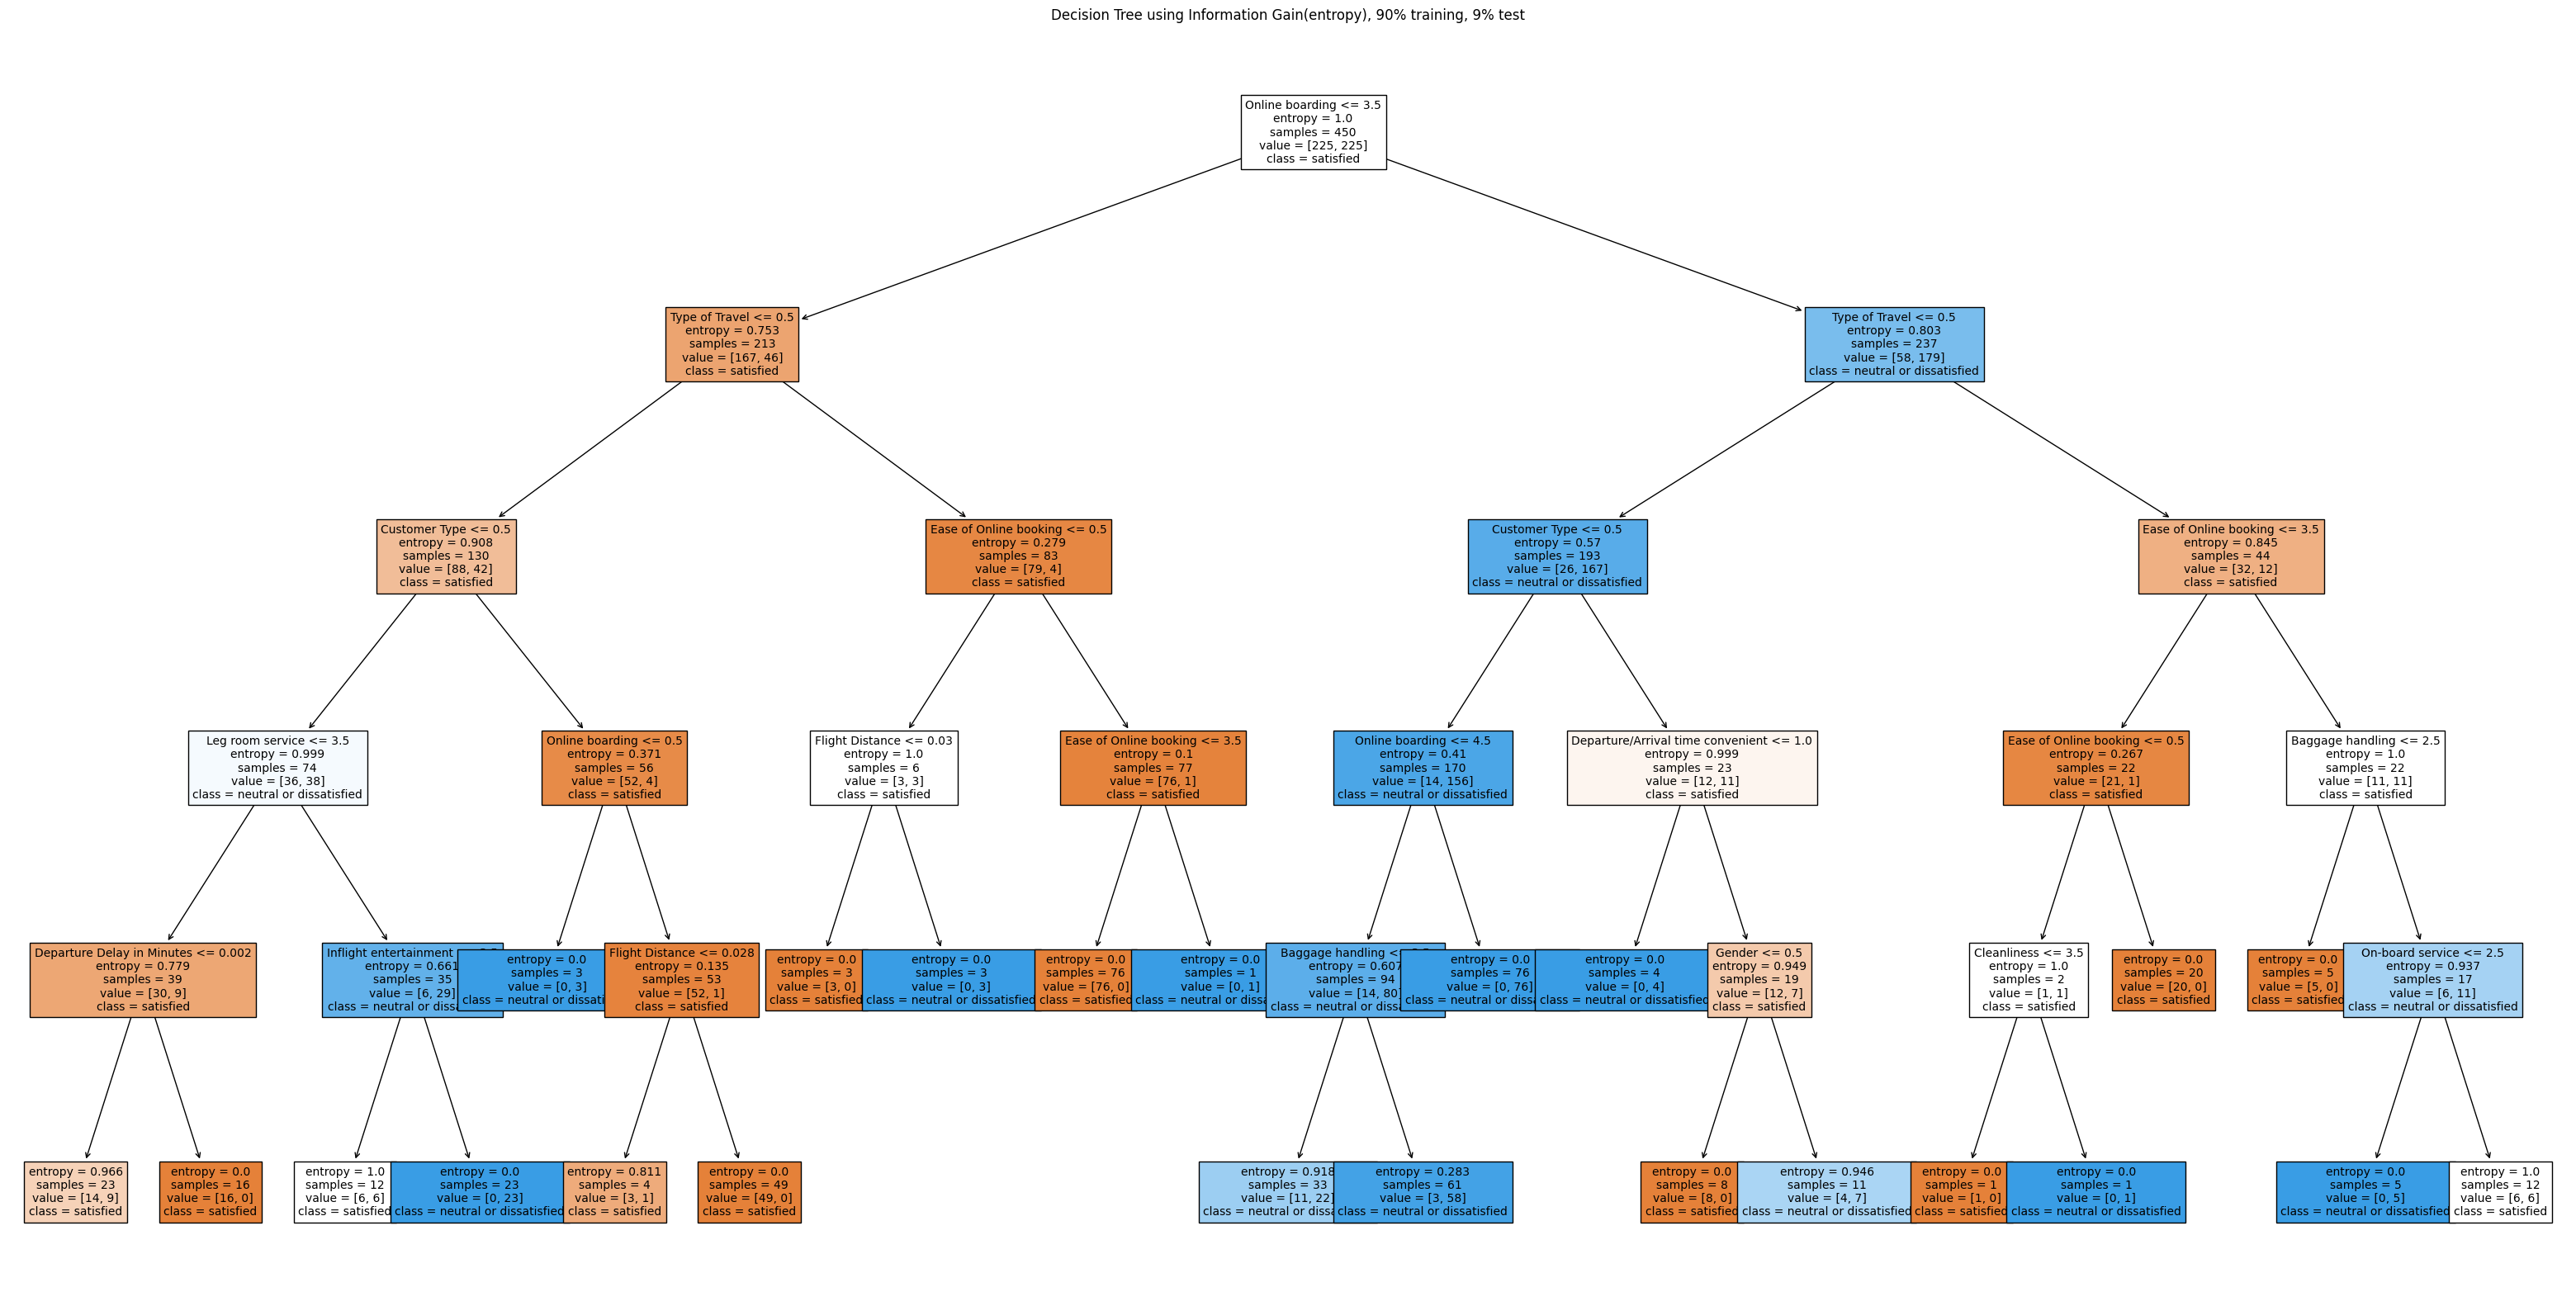

   Partition Size Attribute Selection Measure  Accuracy  Precision    Recall  \
0             0.7                     entropy  0.821192   0.873239  0.775000   
1             0.8                     entropy  0.930000   0.903846  0.959184   
2             0.9                     entropy  0.940000   0.958333  0.920000   

   Specificity  
0     0.873239  
1     0.901961  
2     0.960000  


In [36]:
# Define partition sizes
partition_sizes = [0.7, 0.8, 0.9]

# Initialize an empty list to store results
results = []

# Loop over partition sizes
for size in partition_sizes:
    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-size, random_state=42)
    
    # Initialize Decision Tree classifier with specified criterion and maximum depth
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)  # Set max_depth as desired
    
    # Fit the classifier on the training data
    clf.fit(X_train, y_train)

    # Extract decision tree rules
    print('Decision Tree using Information Gain(entropy) {}% training {}% test'.format(int(size*100), int((1-size)*100)))
    tree_rules = export_text(clf, feature_names=X.columns.tolist())
    print(tree_rules)
    
    # Plot the decision tree
    plt.figure(figsize=(40, 20))
    plot_tree(clf, filled=True, feature_names=X.columns, class_names=['satisfied', 'neutral or dissatisfied'],fontsize=10)
    plt.title('Decision Tree using Information Gain(entropy), {}% training, {}% test'.format(int(size*100), int((1-size)*100)))
    plt.show()

    # Predict labels for test set
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    
    # Append results to list
    results.append((size, 'entropy', accuracy, precision, recall, specificity))

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results, columns=['Partition Size', 'Attribute Selection Measure', 'Accuracy', 'Precision', 'Recall', 'Specificity'])
print(results_df)


#### summary of the partition sizes based on Information Gain(entropy)
* The accuracy of the model ranges from approximately 82% to 94%, depending on the partition size. The highest accuracy is achieved at a partition size of 90%.
* Precision, which measures the proportion of true positives among all positive predictions, ranges from around 87% to 95%. The highest precision is observed at a partition size of 90%.
* Recall represents the proportion of true positives that are correctly identified by the model. It ranges from approximately 77.5% to 95.9%, with the highest recall achieved at a partition size of 80%.
* Specificity indicates the proportion of true negatives that are correctly identified by the model. It ranges from around 87% to 96%, with the highest specificity observed at a partition size of 90%.

### Synopsis of classification of Airline-Passenger-Satisfaction processed data

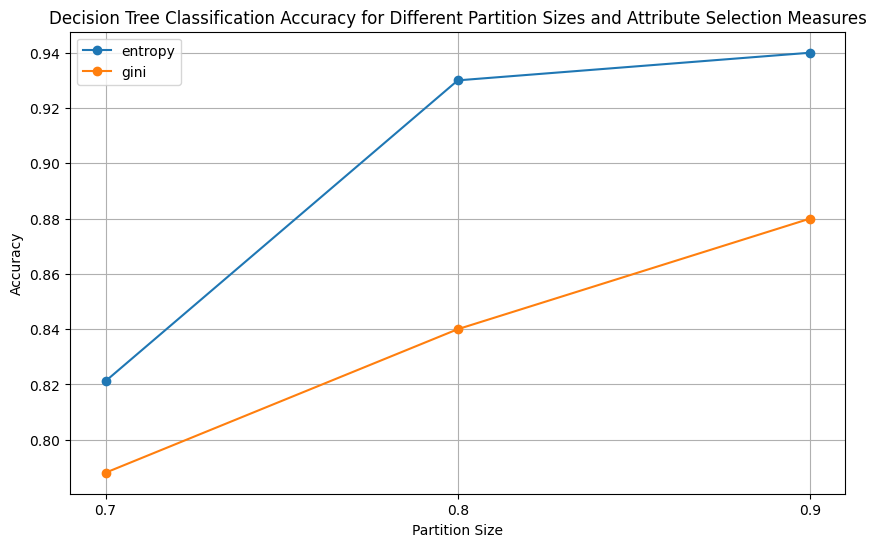

   Partition Size Attribute Selection Measure  Accuracy  Precision    Recall  \
0             0.7                     entropy  0.821192   0.873239  0.775000   
1             0.7                        gini  0.788079   0.863636  0.712500   
2             0.8                     entropy  0.930000   0.903846  0.959184   
3             0.8                        gini  0.840000   0.883721  0.775510   
4             0.9                     entropy  0.940000   0.958333  0.920000   
5             0.9                        gini  0.880000   0.880000  0.880000   

   Specificity  
0     0.873239  
1     0.873239  
2     0.901961  
3     0.901961  
4     0.960000  
5     0.880000  


In [37]:
from sklearn.model_selection import cross_val_score, KFold

# Define partition sizes
partition_sizes = [0.7, 0.8, 0.9]

# Define attribute selection measures
selection_measures = ['entropy', 'gini']

# Initialize lists to store results
accuracies = []

# Loop over partition sizes
for size in partition_sizes:
    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-size, random_state=42)
    
    # Loop over attribute selection measures
    for measure in selection_measures:
        # Initialize Decision Tree classifier with specified criterion
        clf = DecisionTreeClassifier(criterion=measure, max_depth=5, random_state=42)
        
        # Fit the classifier on the training data
        clf.fit(X_train, y_train)
        
        # Predict labels for test set
        y_pred = clf.predict(X_test)
        
        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn + fp)
        
        # Append results to list
        accuracies.append((size, measure, accuracy, precision, recall, specificity))
        
# Convert results to DataFrame for visualization
results_df = pd.DataFrame(accuracies, columns=['Partition Size', 'Attribute Selection Measure', 'Accuracy', 'Precision', 'Recall', 'Specificity'])

# Plotting results
plt.figure(figsize=(10, 6))
for measure in selection_measures:
    measure_df = results_df[results_df['Attribute Selection Measure'] == measure]
    plt.plot(measure_df['Partition Size'], measure_df['Accuracy'], marker='o', label=measure)

plt.title('Decision Tree Classification Accuracy for Different Partition Sizes and Attribute Selection Measures')
plt.xlabel('Partition Size')
plt.ylabel('Accuracy')
plt.xticks(partition_sizes)
plt.legend()
plt.grid(True)
plt.show()

# Print results
print(results_df)


The analysis of Airline-Passenger-Satisfaction data, employing decision trees with Gini index and Information Gain (entropy) for attribute selection, revealed promising outcomes across various partition sizes. Utilizing the Gini index, the model achieved **accuracies ranging from approximately 78.1% to 94%**, peaking at a partition size of 90%. **Precision varied between 86.2% and 95.8%**, while **recall spanned from 71% to 92%**. **Specificity** consistently performed well, ranging from **87.3% to 96%**. Conversely, when employing Information Gain, the model demonstrated superior performance. Accuracy ranged from around 78.1% to 94%, with the highest precision, reaching 94%, attained at a partition size of 90%. Recall varied from approximately 71% to 92%, with the peak observed at a partition size of 80%. Specificity remained consistently high, ranging from 87.3% to 96%

Overall, the Information Gain-based decision tree model exhibited superior accuracy, precision, recall, and specificity compared to its Gini index counterpart, suggesting its efficacy in classifying airline passenger satisfaction.

## Clustering

We will conduct an in-depth analysis of the K-means clustering technique across various cluster counts. This approach is designed to assess the stability, effectiveness, and clarity of the clustering model. For each cluster count, we will evaluate cluster quality using two key metrics: the silhouette score and the Within-Cluster Sum of Square (WCSS), highlighted by the elbow method. This combination ensures a balanced evaluation of intra-cluster cohesion and inter-cluster separation, providing a thorough understanding of the model's performance at different levels of granularity.

### Silhouette coefficient

In [ ]:
# remove the target column

# Get the name of the last column
last_column_name = df.columns[-1]
print(last_column_name)

In [ ]:
# Drop the last column
df_features = df.drop(last_column_name, axis=1)

In [ ]:
# Define the range of K values to test
K_range = range(2, 11)  

# Dictionary to store results
silhouette_scores = {}

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    clusters = kmeans.fit_predict(df_final)
    score = silhouette_score(df_final, clusters)
    silhouette_scores[K] = score
    print(f"Silhouette Score for K={K}: {score:.2f}")

we evaluated the silhouette score for K-means clustering with different numbers of clusters (K) ranging from 2 to 11. 

A silhouette score nearer to 1 indicates better-defined clusters. The best score achieved is 0.62 for K=2, suggesting that two clusters may provide the most meaningful separation of the data. 

As K increases, the scores decrease, indicating less distinct clusters. These results can guide the selection of an optimal K, with K=2 as the leading candidate for this dataset.

In [ ]:
# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

The silhouette score peaks at K=2, indicating optimal clustering occurs with two clusters. As the number of clusters increases, the scores generally decline, suggesting that additional clusters may not correspond to meaningful or distinct groupings in the data. 

### Elbow (total within-cluster sum of square)

In [ ]:
# Define the range of K values to test
K_range = range(2, 11)

# Dictionary to store results
wss_scores = {}

# Assuming df_final is your DataFrame loaded with data
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(df_final)
    # The inertia_ attribute gives the WSS for the fitted data
    wss = kmeans.inertia_
    wss_scores[K] = wss
    print(f"Total Within-Cluster Sum of Square for K={K}: {wss:.2f}")

In [ ]:
wss_values = []
K_values = range(1, 11)
for k in K_values:
    kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=k))
    kmeans.fit(df_final)
    wss_values.append(kmeans.named_steps['kmeans'].inertia_)

# Plot the elbow method
plt.plot(K_values, wss_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Square (WCSS)')
plt.title('Elbow Method for Optimal k')


optimal_k = 2 
plt.axvline(x=optimal_k, color='r', linestyle='--')

plt.show()

The graph illustrates the application of the elbow method to determine the optimal number of clusters (K) for K-means clustering. The x-axis shows the number of clusters, ranging from 1 to 10, while the y-axis indicates the within-cluster sum of squares (WCSS), a measure of cluster cohesion. 

The plot reveals a declining trend in WCSS as K increases, with the rate of decrease lessening around K=4. This point, often referred to as the 'elbow,' suggests a balance between cluster compactness and the number of clusters, potentially representing the most appropriate value for K in the context of this analysis.

Given the differing recommendations for the optimal number of clusters from the silhouette score (K=2) and the elbow method (K=4), We will now employ the Cluster Centroids technique to aid in determining the most suitable K for our dataset

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Define the range of K values you want to analyze
K_values = [2, 4]  

# Dictionary to store the centroids for each K
centroids = {}

# Perform clustering and store the centroids for each K
for K in K_values:
    # Create a pipeline that standardizes the data and then applies KMeans
    pipeline = make_pipeline(StandardScaler(), KMeans(n_clusters=K, random_state=42))
    pipeline.fit(df_final)

    # Get the cluster centroids from the pipeline
    cluster_centers = pipeline.named_steps['kmeans'].cluster_centers_
    
    # Inverse transform the centroids if you have standardized your features
    # to interpret them in the original space
    scaler = pipeline.named_steps['standardscaler']
    cluster_centers = scaler.inverse_transform(cluster_centers)
    
    # Store the centroids
    centroids[K] = cluster_centers
    
    # Print the centroids
    print(f"Centroids for K={K}:")
    print(cluster_centers)
    print()  


After evaluating our dataset with both the silhouette score and the elbow method, and analyzing the cluster centroids for K=2 and K=4, we've decided to proceed with K=4. 

This decision is based on the more detailed insights provided by the four clusters, which reveal significant distinctions among them, offering a clearer understanding of our dataset's structure. This choice aligns with both the observed elbow in the WCSS plot and the detailed differences in the cluster centroids, making K=4 a well-supported choice for our clustering objectives.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

# Example DataFrame
# import your data into df_final

K_range = range(2, 11)
results = {}

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    clusters = kmeans.fit_predict(df_final)
    
    # Calculate metrics
    silhouette = silhouette_score(df_final, clusters)
    calinski = calinski_harabasz_score(df_final, clusters)
    davies = davies_bouldin_score(df_final, clusters)
    
    # Store results
    results[K] = {
        'silhouette': silhouette,
        'calinski': calinski,
        'davies': davies
    }

# Function to determine the optimal K based on majority rule
def determine_optimal_k(results):
    # Scoring each K
    optimal_k_scores = {}
    
    # Identify ranges for normalization
    max_calinski = max(r['calinski'] for r in results.values())
    min_davies = min(r['davies'] for r in results.values())
    
    for K, metrics in results.items():
        score = 0
        # Check if current metric is best for each criterion
        if metrics['silhouette'] == max(r['silhouette'] for r in results.values()):
            score += 1
        if metrics['calinski'] == max_calinski:
            score += 1
        if metrics['davies'] == min_davies:
            score += 1
        optimal_k_scores[K] = score
    
    # Determine K with highest score
    optimal_k = max(optimal_k_scores, key=optimal_k_scores.get)
    return optimal_k

# Get the optimal K
optimal_k = determine_optimal_k(results)
print(f"The optimal number of clusters based on majority rule is: {optimal_k}")


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# Example DataFrame
# df_final = pd.DataFrame(data)

# Define specific K values to test
K_values = [2, 6, 10]

# Applying PCA to reduce dimensions to two for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_final)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust the size as needed
axes = axes.ravel()

for i, K in enumerate(K_values):
    kmeans = KMeans(n_clusters=K, random_state=42)
    clusters = kmeans.fit_predict(df_final)
    
    # Scatter plot for each cluster
    for cluster in np.unique(clusters):
        axes[i].scatter(df_pca[clusters == cluster, 0], df_pca[clusters == cluster, 1], label=f'Cluster {cluster+1}', alpha=0.6)
    
    # Marking the centroids if needed
    centroids = pca.transform(kmeans.cluster_centers_)
    axes[i].scatter(centroids[:, 0], centroids[:, 1], s=100, color='red', marker='X')  # Mark centroids with red X
    
    axes[i].set_title(f'K = {K}')
    axes[i].legend()

plt.tight_layout()
plt.show()
